<h1 style="color:violet">Combine Google Trends with other Time Series Data</h1>

<p style="color:smokewhite; font-size:20px;">Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?</p>

<h2 style="color:violet;"><em>Questions to Answer</em></h2>

<ol style="color:smokewhite; font-size:20px;">
<li>How search volume for "Bitcoin" relates to the price of Bitcoin</li>

<li>How search volume for a hot stock like Telsa relates to that stock's price?</li>

<li>How searches for "Unemployment Benefits" vary with the actual unemployment rate in the United States?</li>

</ol>

<h3 style="color:violet;"><em>Loading the needed packages</em></h3>

In [57]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

<h3 style="color:violet;"><em>Loading the datasets</em></h3>

In [4]:
df_tesla = pd.read_csv("./data/TESLA Search Trend vs Price.csv")
df_btc_search = pd.read_csv("./data/Bitcoin Search Trend.csv")
df_btc_price = pd.read_csv("./data/Daily Bitcoin Price.csv")
df_unemployment = pd.read_csv("./data/UE Benefits Search vs UE Rate 2004-19.csv")

<h3 style="color:violet;"><em>Exploring the data</em></h3>

<h4 >TESLA</h4>

In [5]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [9]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            124 non-null    object 
 1   TSLA_WEB_SEARCH  124 non-null    int64  
 2   TSLA_USD_CLOSE   124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [10]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


<h4 style="color:smokewhite;">What is the highest websearch for tesla</h4>

In [6]:
df_tesla['TSLA_WEB_SEARCH'].max()

31

<h4 style="color:smokewhite;">What was the date for the highest websearch</h4>

In [8]:
df_tesla.iloc[df_tesla['TSLA_WEB_SEARCH'].argmax()]

MONTH              2020-09-01
TSLA_WEB_SEARCH            31
TSLA_USD_CLOSE     407.339996
Name: 123, dtype: object

<h4 >Unemployment</h4>

In [11]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [12]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   181 non-null    object 
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64  
 2   UNRATE                  181 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


In [13]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [14]:
df_unemployment.iloc[df_unemployment['UE_BENEFITS_WEB_SEARCH'].argmax()]

MONTH                     2009-02
UE_BENEFITS_WEB_SEARCH        100
UNRATE                        8.3
Name: 61, dtype: object

<h4 >Bitcoin</h4>

In [15]:
df_btc_search

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5
...,...,...
68,2020-05,22
69,2020-06,13
70,2020-07,14
71,2020-08,16


In [16]:
df_btc_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MONTH            73 non-null     object
 1   BTC_NEWS_SEARCH  73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [17]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [18]:
df_btc_search.iloc[df_btc_search['BTC_NEWS_SEARCH'].argmax()]

MONTH              2017-12
BTC_NEWS_SEARCH        100
Name: 39, dtype: object

In [19]:
df_tesla.isna().sum()

MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64

In [20]:
df_btc_price.isna().sum()

DATE      0
CLOSE     1
VOLUME    1
dtype: int64

In [21]:
df_unemployment.isna().sum()

MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64

In [23]:
df_btc_search.isna().sum()

MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64

In [37]:
df_btc_price.loc[df_btc_price['CLOSE'].isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [38]:
df_btc_price.dropna(inplace=True)

In [39]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])

In [40]:
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])

In [41]:
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])

In [42]:
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])

In [44]:
df_btc_monthly_price = df_btc_price.resample(rule='M', on='DATE').mean()

In [45]:
df_btc_monthly_price.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07


<h3 style="color:violet;"><em>Visualizing Data</em></h3>

Text(0.5, 1.0, 'TSLA web search vs close price')

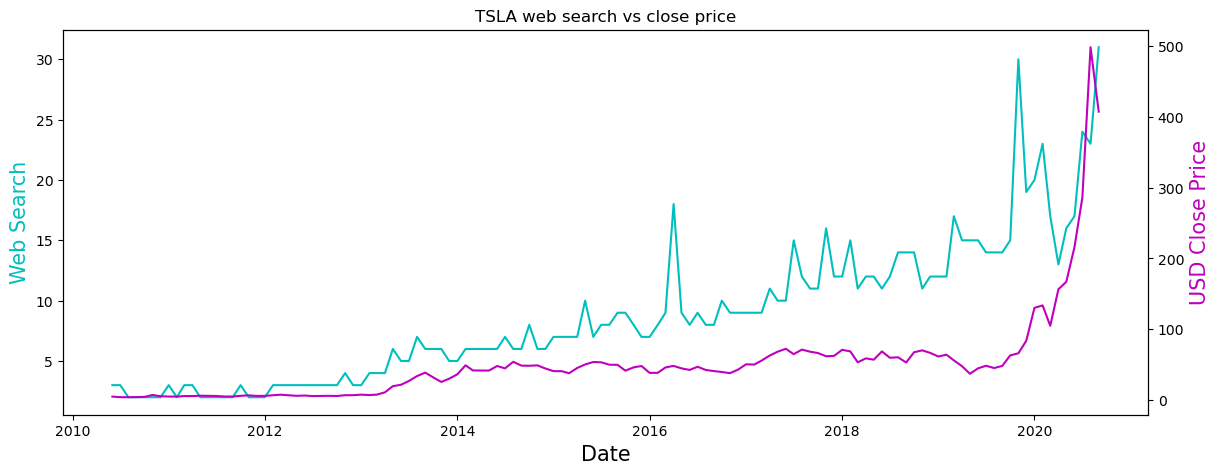

In [56]:

plt.figure(figsize=(14,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], 'c')
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'],'m')
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel("Web Search", fontsize=15, color="c")
ax2.set_ylabel("USD Close Price", fontsize=15, color="m")
plt.title("TSLA web search vs close price")


<h3 style="color:violet;"><em>Creating Ticks on plot with locators and formators</em></h3>

In [58]:
# creating loactor objects for dates
year = mdates.YearLocator()
month = mdates.MonthLocator()
year_fmt = mdates.DateFormatter('%Y')

Text(0.5, 1.0, 'TSLA web search vs close price')

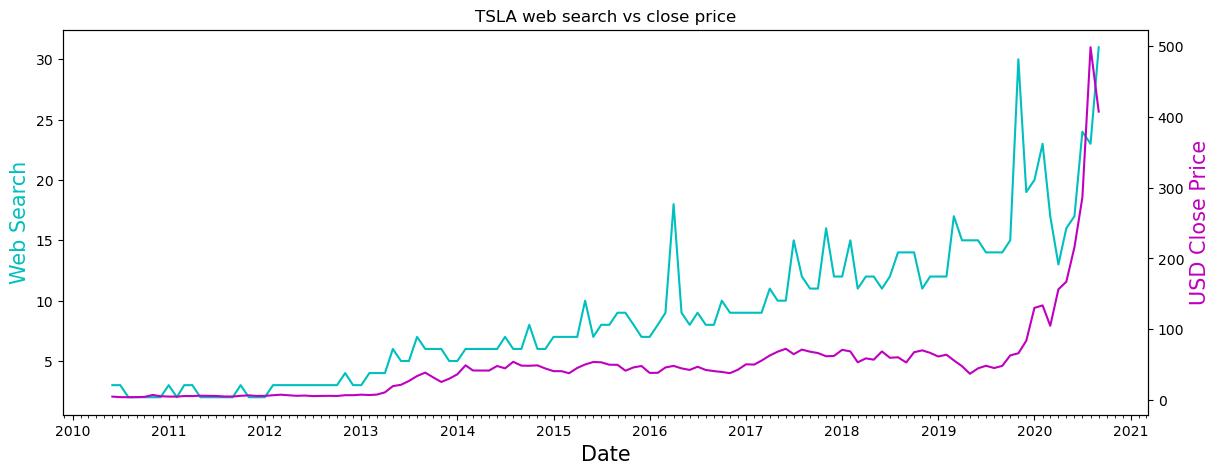

In [60]:
plt.figure(figsize=(14,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], 'c')
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'],'m')

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(month)


ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel("Web Search", fontsize=15, color="c")
ax2.set_ylabel("USD Close Price", fontsize=15, color="m")
plt.title("TSLA web search vs close price")


Text(0.5, 1.0, 'BTC Web Search vs Price')

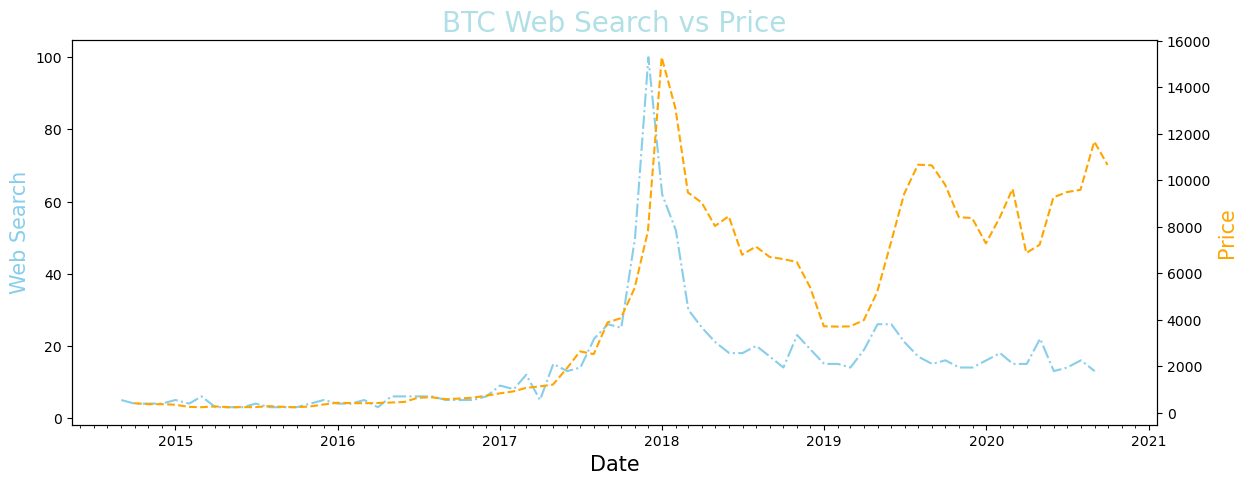

In [69]:
plt.figure(figsize=(14,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_btc_search['MONTH'], df_btc_search['BTC_NEWS_SEARCH'], color='skyblue', linestyle='dashdot')
ax2.plot(df_btc_monthly_price.index, df_btc_monthly_price['CLOSE'],color='orange', linestyle='dashed')

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(month)


ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel("Web Search", fontsize=15, color="skyblue")
ax2.set_ylabel("Price", fontsize=15, color="orange")
plt.title("BTC Web Search vs Price", fontsize=20, color="powderblue")


Text(0.5, 1.0, "Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate")

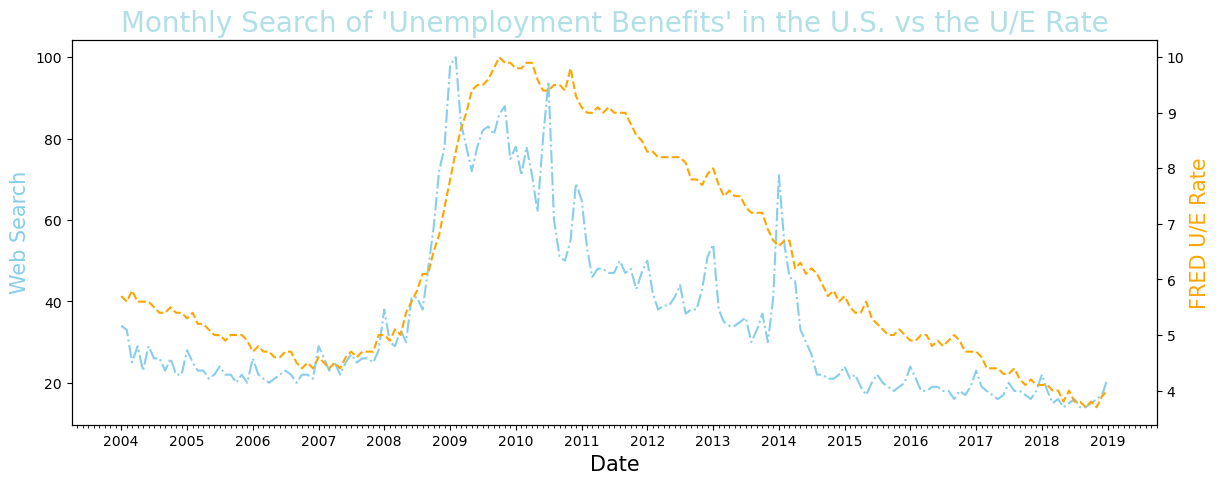

In [72]:
plt.figure(figsize=(14,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'], color='skyblue', linestyle='dashdot')
ax2.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'],color='orange', linestyle='dashed')

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(month)


ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel("Web Search", fontsize=15, color="skyblue")
ax2.set_ylabel("FRED U/E Rate", fontsize=15, color="orange")
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate", fontsize=20, color="powderblue")


In [74]:
df_unemp = pd.read_csv("./Data/UE Benefits Search vs UE Rate 2004-20.csv", parse_dates=True)

In [75]:
df_unemp.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [76]:
df_unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   200 non-null    object 
 1   UE_BENEFITS_WEB_SEARCH  200 non-null    int64  
 2   UNRATE                  200 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


In [77]:
df_unemp['MONTH'] =pd.to_datetime(df_unemp['MONTH'])

Text(0.5, 1.0, "Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate")

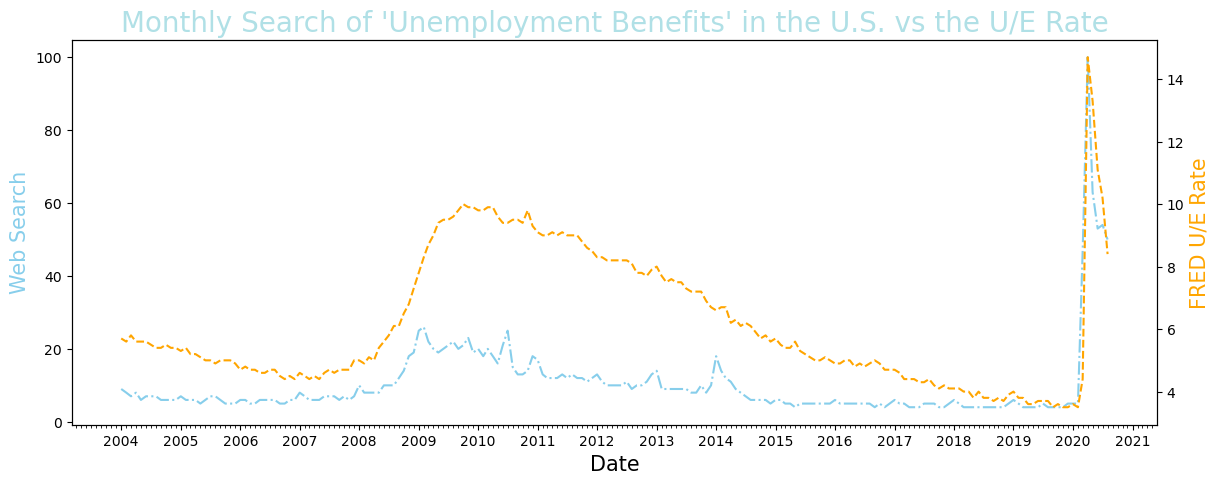

In [78]:
plt.figure(figsize=(14,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_unemp['MONTH'], df_unemp['UE_BENEFITS_WEB_SEARCH'], color='skyblue', linestyle='dashdot')
ax2.plot(df_unemp['MONTH'], df_unemp['UNRATE'],color='orange', linestyle='dashed')

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(month)


ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel("Web Search", fontsize=15, color="skyblue")
ax2.set_ylabel("FRED U/E Rate", fontsize=15, color="orange")
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate", fontsize=20, color="powderblue")